In [1]:
!pip install datasets
!pip install transformers
!pip install evaluate
import evaluate

from datasets import load_dataset
imdbDataset = load_dataset("imdb")
yelpDataset = load_dataset("yelp_review_full")

from transformers import pipeline
bert_pipelineTrun = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", truncation=True)
distilbert_pipelineTrun = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", truncation=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [2]:
imdbReviews = imdbDataset["test"]["text"]
imdbLabels = imdbDataset["test"]["label"]

yelpReviews = yelpDataset["test"]["text"]
yelpTrueLabels = yelpDataset["test"]["label"]

bertImdbResults = bert_pipelineTrun(imdbReviews)
distilbertImdbResults = distilbert_pipelineTrun(imdbReviews)

bertYelpResults = bert_pipelineTrun(yelpReviews)
distilbertYelpResults = distilbert_pipelineTrun(yelpReviews)

In [3]:
yelpLabelMapping = {"0": 0, "1": 0, "2": 1, "3": 1, "4": 1}
yelpTrueLabels = [yelpLabelMapping[str(label)] for label in yelpTrueLabels]

bertImdbLabels = [result["label"] for result in bertImdbResults]
distilbertImdbLabels = [result["label"] for result in distilbertImdbResults]

bertImdbLabelMapping = {"1 star": 0, "2 stars": 0, "3 stars": 1, "4 stars": 1, "5 stars": 1}
distilbertImdbLabelMapping = {"NEGATIVE": 0, "POSITIVE": 1}
bertImdbLabels = [bertImdbLabelMapping[label] for label in bertImdbLabels]
distilbertImdbLabels = [distilbertImdbLabelMapping[label] for label in distilbertImdbLabels]

bertYelpLabels = [result["label"] for result in bertYelpResults]
distilbertYelpLabels = [result["label"] for result in distilbertYelpResults]

bertYelpLabelMapping = {"1 star": 0, "2 stars": 0, "3 stars": 1, "4 stars": 1, "5 stars": 1}
distilbertYelpLabelMapping = {"NEGATIVE": 0, "POSITIVE": 1}
distilbertYelpLabels = [distilbertYelpLabelMapping[label] for label in distilbertYelpLabels]
bertYelpLabels = [bertYelpLabelMapping[label] for label in bertYelpLabels]

In [4]:
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

bertAccuracy = accuracy_metric.compute(predictions=bertImdbLabels, references=imdbLabels)
bertF1 = f1_metric.compute(predictions=bertImdbLabels, references=imdbLabels)

print("IMDB Reviews (Truncating):")
print("BERT Accuracy (Truncated):", bertAccuracy["accuracy"])
print("BERT F1 Score (Truncated):", bertF1["f1"])

distilbertAccuracy = accuracy_metric.compute(predictions=distilbertImdbLabels, references=imdbLabels)
distilbertF1 = f1_metric.compute(predictions=distilbertImdbLabels, references=imdbLabels)

print("DistilBERT Accuracy (Truncated):", distilbertAccuracy["accuracy"])
print("DistilBERT F1 Score (Truncated):", distilbertF1["f1"])

IMDB Reviews (Truncating):
BERT Accuracy (Truncated): 0.8556
BERT F1 Score (Truncated): 0.8650063570413582
DistilBERT Accuracy (Truncated): 0.89072
DistilBERT F1 Score (Truncated): 0.8874794069192751


In [5]:
bertYelpAccuracy = accuracy_metric.compute(predictions=bertYelpLabels, references=yelpTrueLabels)
bertYelpF1 = f1_metric.compute(predictions=bertYelpLabels, references=yelpTrueLabels, average="weighted")

print("Yelp Reviews (Truncating):")
print("BERT Accuracy (Truncated):", bertYelpAccuracy["accuracy"])
print("BERT F1 Score (Truncated):", bertYelpF1["f1"])

distilbertYelpAccuracy = accuracy_metric.compute(predictions=distilbertYelpLabels, references=yelpTrueLabels)
distilbertYelpF1 = f1_metric.compute(predictions=distilbertYelpLabels, references=yelpTrueLabels, average="weighted")

print("DistilBERT Accuracy (Truncated):", distilbertYelpAccuracy["accuracy"])
print("DistilBERT F1 Score (Truncated):", distilbertYelpF1["f1"])

Yelp Reviews (Truncating):
BERT Accuracy (Truncated): 0.86278
BERT F1 Score (Truncated): 0.8623747864713464
DistilBERT Accuracy (Truncated): 0.82458
DistilBERT F1 Score (Truncated): 0.8263340259137584


In [14]:
bertImdbMismatches = [(imdbReviews[i], imdbLabels[i], bertImdbLabels[i]) for i in range(len(imdbLabels)) if imdbLabels[i] != bertImdbLabels[i]][:5]
distilbertImdbMismatches = [(imdbReviews[i], imdbLabels[i], distilbertImdbLabels[i]) for i in range(len(imdbLabels)) if imdbLabels[i] != distilbertImdbLabels[i]][:5]

bertYelpMismatches = [(yelpReviews[i], yelpTrueLabels[i], bertYelpLabels[i]) for i in range(len(yelpTrueLabels)) if yelpTrueLabels[i] != bertYelpLabels[i]][:5]
distilbertYelpMismatches = [(yelpReviews[i], yelpTrueLabels[i], distilbertYelpLabels[i]) for i in range(len(yelpTrueLabels)) if yelpTrueLabels[i] != distilbertYelpLabels[i]][:5]

def print_reviews(title, reviews):
    print(title)
    for review, true_label, predicted_label in reviews:
        print(f"Review: {review}")
        print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
        print("-" * 80)  # Separator for readability

print_reviews("5 Reviews that BERT Failed on IMDB:", bertImdbMismatches)
print_reviews("5 Reviews that distilBERT Failed on IMDB:", distilbertImdbMismatches)
print_reviews("5 Reviews that BERT Failed on Yelp:", bertYelpMismatches)
print_reviews("5 Reviews that distilBERT Failed on Yelp:", distilbertYelpMismatches)

5 Reviews that BERT Failed on IMDB:
Review: Worth the entertainment value of a rental, especially if you like action movies. This one features the usual car chases, fights with the great Van Damme kick style, shooting battles with the 40 shell load shotgun, and even terrorist style bombs. All of this is entertaining and competently handled but there is nothing that really blows you away if you've seen your share before.<br /><br />The plot is made interesting by the inclusion of a rabbit, which is clever but hardly profound. Many of the characters are heavily stereotyped -- the angry veterans, the terrified illegal aliens, the crooked cops, the indifferent feds, the bitchy tough lady station head, the crooked politician, the fat federale who looks like he was typecast as the Mexican in a Hollywood movie from the 1940s. All passably acted but again nothing special.<br /><br />I thought the main villains were pretty well done and fairly well acted. By the end of the movie you certainly k

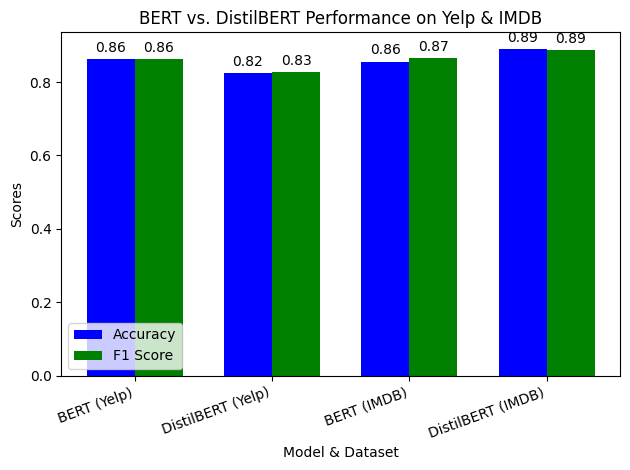

In [12]:
import matplotlib.pyplot as plt

models = ["BERT (Yelp)", "DistilBERT (Yelp)", "BERT (IMDB)", "DistilBERT (IMDB)"]
accuracy_scores = [bertYelpAccuracy["accuracy"], distilbertYelpAccuracy["accuracy"], bertAccuracy["accuracy"], distilbertAccuracy["accuracy"]]
f1_scores = [bertYelpF1["f1"], distilbertYelpF1["f1"], bertF1["f1"], distilbertF1["f1"]]

x = list(range(len(models)))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], accuracy_scores, width, label='Accuracy', color='b')
rects2 = ax.bar([i + width/2 for i in x], f1_scores, width, label='F1 Score', color='g')

ax.set_xlabel('Model & Dataset')
ax.set_ylabel('Scores')
ax.set_title('BERT vs. DistilBERT Performance on Yelp & IMDB')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [7]:
#Chunking Method:
bert_pipelineChun = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", truncation=False)
distilbert_pipelineChun = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", truncation=False)

Device set to use cuda:0
Device set to use cuda:0


In [8]:
imdbChunkTexts = []
for review in imdbDataset['test']:
    text = review['text']
    words = text.split()
    maxTokens = 128
    chunks = [words[i:i + maxTokens] for i in range(0, len(words), maxTokens)]
    imdbChunkTexts.extend([' '.join(chunk) for chunk in chunks])

yelpChunkTexts = []
for review in yelpDataset['test']:
    text = review['text']
    words = text.split()
    maxTokens = 30
    chunks = [words[i:i + maxTokens] for i in range(0, len(words), maxTokens)]
    yelpChunkTexts.extend([' '.join(chunk) for chunk in chunks])

In [10]:
bertImdbResultsChun = bert_pipelineChun(imdbChunkTexts)
distilbertImdbResultsChun = distilbert_pipelineChun(imdbChunkTexts)

bertYelpResultsChun = bert_pipelineChun(yelpChunkTexts)
distilbertYelpResultsChun = distilbert_pipelineChun(yelpChunkTexts)

KeyboardInterrupt: 

In [ ]:
imdbLabelsChun = imdbDataset["test"]["label"]
yelpTrueLabelsChun = yelpDataset["test"]["label"]

yelpLabelMappingChun = {"0": 0, "1": 0, "2": 1, "3": 1, "4": 1}
yelpTrueLabelsChun = [yelpLabelMappingChun[str(label)] for label in yelpTrueLabelsChun]

bertImdbLabelsChun = [result["label"] for result in bertImdbResultsChun]
distilbertImdbLabelsChun = [result["label"] for result in distilbertImdbResultsChun]

bertImdbLabelMappingChun = {"1 star": 0, "2 stars": 0, "3 stars": 1, "4 stars": 1, "5 stars": 1}
distilbertImdbLabelMappingChun = {"NEGATIVE": 0, "POSITIVE": 1}
bertImdbLabelsChun = [bertImdbLabelMappingChun[label] for label in bertImdbLabelsChun]
distilbertImdbLabelsChun = [distilbertImdbLabelMappingChun[label] for label in distilbertImdbLabelsChun]

bertYelpLabelsChun = [result["label"] for result in bertYelpResultsChun]
distilbertYelpLabelsChun = [result["label"] for result in distilbertYelpResultsChun]

bertYelpLabelMappingChun = {"1 star": 0, "2 stars": 0, "3 stars": 1, "4 stars": 1, "5 stars": 1}
distilbertYelpLabelMappingChun = {"NEGATIVE": 0, "POSITIVE": 1}
distilbertYelpLabelsChun = [distilbertYelpLabelMappingChun[label] for label in distilbertYelpLabelsChun]
bertYelpLabelsChun = [bertYelpLabelMappingChun[label] for label in bertYelpLabelsChun]

In [ ]:
bertAccuracyChun = accuracy_metric.compute(predictions=bertImdbLabelsChun, references=imdbLabels)
bertF1Chun = f1_metric.compute(predictions=bertImdbLabelsChun, references=imdbLabels)

print("IMDB Reviews (Chunking):")
print("BERT Accuracy (Truncated):", bertAccuracyChun["accuracy"])
print("BERT F1 Score (Truncated):", bertF1Chun["f1"])

distilbertAccuracyChun = accuracy_metric.compute(predictions=distilbertImdbLabelsChun, references=imdbLabels)
distilbertF1Chun = f1_metric.compute(predictions=distilbertImdbLabelsChun, references=imdbLabels)

print("DistilBERT Accuracy (Truncated):", distilbertAccuracyChun["accuracy"])
print("DistilBERT F1 Score (Truncated):", distilbertF1Chun["f1"])

In [ ]:
bertYelpAccuracyChun = accuracy_metric.compute(predictions=bertYelpLabelsChun, references=yelpTrueLabelsChun)
bertYelpF1Chun = f1_metric.compute(predictions=bertYelpLabelsChun, references=yelpTrueLabels, average="weighted")

print("Yelp Reviews (Chunking):")
print("BERT Accuracy (Truncated):", bertYelpAccuracyChun["accuracy"])
print("BERT F1 Score (Truncated):", bertYelpF1Chun["f1"])

distilbertYelpAccuracyChun = accuracy_metric.compute(predictions=distilbertYelpLabelsChun, references=yelpTrueLabelsChun)
distilbertYelpF1Chun = f1_metric.compute(predictions=distilbertYelpLabelsChun, references=yelpTrueLabels, average="weighted")

print("DistilBERT Accuracy (Truncated):", distilbertYelpAccuracyChun["accuracy"])
print("DistilBERT F1 Score (Truncated):", distilbertYelpF1Chun["f1"])

---
# Truncated Method:
Models:
- "nlptown/bert-base-multilingual-uncased-sentiment"
- "distilbert-base-uncased-finetuned-sst-2-english"

Datasets:
- IMDB Reviews
- Yelp Reviews

##Results

    IMDB Reviews:

    BERT Accuracy (Truncated): 0.8556
    BERT F1 Score (Truncated): 0.8650063570413582
    DistilBERT Accuracy (Truncated): 0.89072
    DistilBERT F1 Score (Truncated): 0.8874794069192751

‎

    Yelp Reviews:

    Yelp -> BERT Accuracy (Truncated): 0.86278
    Yelp -> BERT F1 Score (Truncated): 0.8623747864713464
    Yelp -> DistilBERT Accuracy (Truncated): 0.82458
    Yelp -> DistilBERT F1 Score (Truncated): 0.8263340259137584
---
##Analysis:

####Short Result Analysis:
distilBERT had a higher accuracy and f1 score and overall performed better than BERT when it came to IMDB Reviews while BERT did better in the Yelp Reviews. The difference between the scores were within 4 percent, while the F1 scores for the IMDB Reviews were closer than that of the Yelp Reviews. Improvements to it could to find a way to bypass the truncation like with Chunking but I am having a difficult time finding a way to chunk.

####Findings:
I chose the IMDB dataset as I thought it was interesting as I quite enjoy movies and I think that movie reviews, especially the ones in the dataset would be hard for the pre-trained models to accurately get the sentiment.




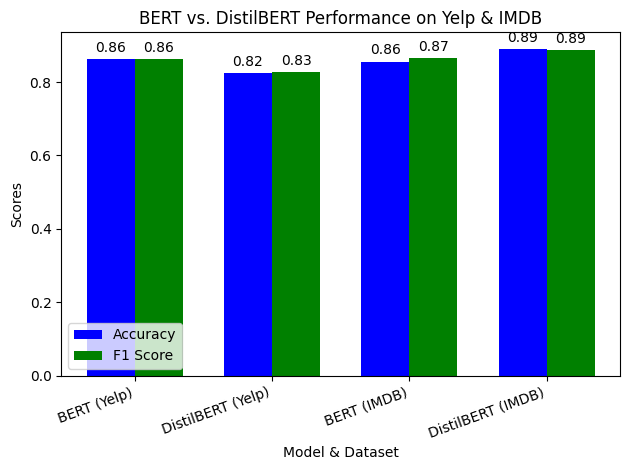

####Misclassified Reviews:

**BERT Misclassification:**

Review: Worth the entertainment value of a rental, especially if you like action movies. This one features the usual car chases, fights with the great Van Damme kick style, shooting battles with the 40 shell load shotgun, and even terrorist style bombs. All of this is entertaining and competently handled but there is nothing that really blows you away if you've seen your share before.<br /><br />The plot is made interesting by the inclusion of a rabbit, which is clever but hardly profound. Many of the characters are heavily stereotyped -- the angry veterans, the terrified illegal aliens, the crooked cops, the indifferent feds, the bitchy tough lady station head, the crooked politician, the fat federale who looks like he was typecast as the Mexican in a Hollywood movie from the 1940s. All passably acted but again nothing special.<br /><br />I thought the main villains were pretty well done and fairly well acted. By the end of the movie you certainly knew who the good guys were and weren't. There was an emotional lift as the really bad ones got their just deserts. Very simplistic, but then you weren't expecting Hamlet, right? The only thing I found really annoying was the constant cuts to VDs daughter during the last fight scene.<br /><br />Not bad. Not good. Passable 4.<br /><br />
True Label: 0, Predicted Label: 1

The review itself is very neutral in a sense where its not explicitly showing a good or a bad review but it does definently lean towards a negative review. Thats where I think BERT struggled in picking the right sentiment. The phrases like "Worth the entertainment value of a rental, especially if you like action movies.", showing a positive side towards the movie and the last few sentences seemed like the movie was enjoyable for the reviewer. While in the middle there were more negative reviews along side some neutralish reviews.

**distilBERT Misclassification:**

Review: Stopped by on a Mon evening after trying to dine at Smoke Taqueria which is closed Mondays. Parking on street in front or behind off Hay St. Super friendly bartender. In warmer months they have huge outdoor area & big screen & upstairs cornhole game area. Okay draft beer selection and big bottle selection. Tried the italian club which was really good - two of us split one. Also tried sweet potato fries - amazingly good! Home made chips w bleu were overpowered by sauce. Bathroom was in need of plaster and wall repairs & was grossed out by toilet brush/holder on a shelf near toilet at eye level. Bet it's a fun place in warmer months.<br /><br />
True Label: 1, Predicted Label: 0

I think the review focused on the negative sections and put those above the positive aspects of the restuarant in a way that it seems like it over looked it. Looking at the phases "grossed out" and possibly "wall repairs" made the model think that this place was run down and in turn giving it a negative rating.

---

# Chunking Method:

Models:
- "nlptown/bert-base-multilingual-uncased-sentiment"
- "distilbert-base-uncased-finetuned-sst-2-english"

Datasets:
- IMDB Reviews
- Yelp Reviews

---

Note: I wasn't able to chunk the text, without geting to many lables compared to the datasets number of labels.

---
